<a href="https://colab.research.google.com/github/Tanushree-6/Tanushree-6-DLM_Term-3/blob/main/CNN_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Handwritten Digit Recognizer using CNN**

### Rahul Bajaj (055036) || Tanushree Nangia (055052)
### Section K
### Group 11

## **Project Information**
Title: MNIST Handwritten Digit Recognizer Using CNN

Tools & Technologies: TensorFlow, Keras, Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn

Dataset Used: MNIST Handwritten Digit Dataset


## **Description of Data**
The MNIST dataset consists of 60,000 training images and 10,000 test images of handwritten digits (0-9). Each image is a grayscale 28x28 pixel representation of a single digit. The dataset is labeled, meaning each image has a corresponding numerical label indicating which digit it represents.

Data Attributes:

- Pixel Values (28x28): Each image is represented by 784 pixel values ranging from 0 to 255.

- Label: The correct digit (0-9) associated with each image.

## **Project Objectives**
- To develop a Convolutional Neural Network (CNN) model to accurately classify handwritten digits.

- To preprocess and normalize the dataset for better model performance.

- To evaluate the accuracy and performance of the trained model using various metrics.

- To provide insights into the model’s performance and possible improvements.

## **Problem Statement**
- Handwritten digit recognition is a critical task in machine learning and computer vision, with applications in various industries such as finance, postal services, and automated document processing. The primary challenge lies in designing a robust and efficient model capable of accurately classifying digits despite variations in handwriting, image quality, and distortions. This project aims to develop a CNN-based recognition system that minimizes misclassification and enhances the reliability of digit recognition in real-world scenarios.

## **CNN Model Architecture**
- Input Layer: 28x28 grayscale images.

- Convolutional Layers: Used for feature extraction.

- Pooling Layers: Reduce the spatial dimensions while retaining features.

- Fully Connected Layers: Final layers to classify digits.

- Activation Functions: ReLU for hidden layers, Softmax for output.


## **Step-by-Step Explanation of the Project**

### **1. Loading the Dataset**
- We start by loading the MNIST dataset, which contains 60,000 training images and 10,000 test images of handwritten digits (0-9).
- Each image is a 28x28 grayscale pixel matrix, representing a single digit.

### **2. Preprocessing the Data**
- Checking for Missing Values: Ensuring the dataset is clean and complete.
- Normalization: Scaling pixel values (0-255) to a range of 0-1 for faster and more stable training.
- Reshaping: Converting each image into a format suitable for CNN input (28x28x1, where 1 represents a single color channel).

### **3. Splitting the Data**
- The dataset is split into training and validation sets to measure performance before final testing.

### **4. Building the CNN Model**
The Convolutional Neural Network (CNN) consists of:
- Input Layer: Accepts 28x28 grayscale images.
- Convolutional Layers: Extract essential features like edges and textures.
- Pooling Layers: Reduce spatial dimensions while preserving key information.
- Fully Connected Layers: Process extracted features for final classification.
- Activation Functions:
  - ReLU (Rectified Linear Unit): Used in hidden layers for non-linearity.
  - Softmax: Used in the final layer to classify digits into one of 10 categories (0-9).

### **5. Training the Model**
- The model is trained using labeled data with backpropagation and optimization techniques.
- Hyperparameters like epochs and batch size are fine-tuned to optimize learning.
- Loss and accuracy metrics are tracked to ensure proper training.

### **6. Evaluating the Model**
- The trained model is tested on unseen test data to measure accuracy.
- A confusion matrix is used to analyze misclassifications and understand where the model struggles.


## **Observations and Findings**
- The model successfully learns from the training dataset and generalizes well on the validation dataset.

- Normalization significantly improves model convergence.

- The CNN model achieves a high accuracy on the test dataset.

- The confusion matrix highlights that misclassification occurs mainly between similar-looking digits (e.g., 3 & 8, 4 & 9).



## **Managerial Insights and Recommendations**
- Business Application: The model can be integrated into various business applications like digit recognition in financial transactions, document digitization, and automated form processing.

- Improvement Areas: Fine-tuning the model with additional training epochs, data augmentation, and hyperparameter optimization could enhance performance.

- Deployment Considerations: Deploying the model as a cloud-based API or an edge device application can provide real-time digit recognition capabilities.

- Future Enhancements: Exploring deeper architectures or using ensemble models might further boost accuracy and robustness in real-world applications.

## **Analysis of Data**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# Train Data

!gdown 14UGW_Hqn8td4iSsxKJaQkEwU14xfhoLh

try:
  rb36tn52train = pd.read_csv("mnist_train.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From (original): https://drive.google.com/uc?id=14UGW_Hqn8td4iSsxKJaQkEwU14xfhoLh
From (redirected): https://drive.google.com/uc?id=14UGW_Hqn8td4iSsxKJaQkEwU14xfhoLh&confirm=t&uuid=77becf91-707f-445f-81b8-f29fb6dabec2
To: /content/mnist_train.csv
100% 110M/110M [00:01<00:00, 69.5MB/s]
File imported successfully


In [ ]:
# Test Data

!gdown 1iE2NMX-xQUbf7rXtqpaSuWC1Jc9Hko6i

try:
  rb36tn52test = pd.read_csv("testfile.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From: https://drive.google.com/uc?id=1iE2NMX-xQUbf7rXtqpaSuWC1Jc9Hko6i
To: /content/testfile.csv
100% 51.1M/51.1M [00:00<00:00, 60.0MB/s]
File imported successfully


In [ ]:
# Extracting the target variable (label) from rb36tn52 dataset
Y_rb36tn52train = rb36tn52train['label']

# Dropping the label column from the dataset to prepare features for training
X_rb36tn52train = rb36tn52train.drop(labels=['label'], axis=1)

# Freeing up memory by deleting the original dataset
del rb36tn52train

# Checking the distribution of the target variable in the training set
Y_rb36tn52train.value_counts()


,count
label,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


In [ ]:
# Checking for any null or missing values in the feature dataset
X_rb36tn52train.isnull().any().describe()


,0
count,784
unique,1
top,False
freq,784


In [ ]:
# Checking for any null or missing values in the test dataset
rb36tn52test.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


# **Normalisation**

In [ ]:
# Normalizing the feature dataset by dividing by 255 (scaling pixel values between 0 and 1)
X_rb36tn52train = X_rb36tn52train / 255

# Normalizing the test dataset by dividing by 255 (scaling pixel values between 0 and 1)
rb36tn52test = rb36tn52test / 255


# **Reshape**

In [ ]:
# Converting the DataFrame to a numpy array and reshaping the feature dataset into a 4D array for model input
X_rb36tn52train = X_rb36tn52train.values.reshape(-1, 28, 28, 1)



In [ ]:
# Convert the DataFrame to a numpy array and reshape the test dataset into a 4D array
rb36tn52test = rb36tn52test.values.reshape(-1, 28, 28, 1)


In [ ]:
# Converting the labels into a one-hot encoded format for classification
Y_rb36tn52train = tf.keras.utils.to_categorical(Y_rb36tn52train, num_classes=10)

# **Train and Validation Data Split**

In [ ]:
# Splitting the dataset into training and validation sets (90% training, 10% validation)
X_rb36tn52train, X_val, Y_rb36tn52train, Y_val = train_test_split(X_rb36tn52train, Y_rb36tn52train,
                                                                  test_size=0.1, random_state=503652)


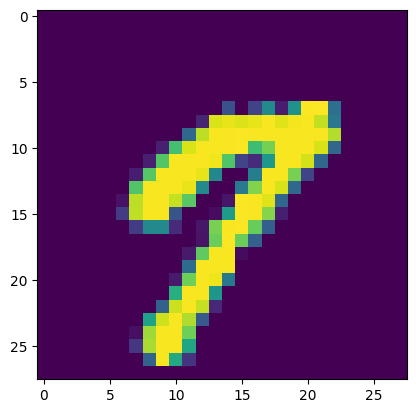

In [ ]:
# Displaying the first image in the training set (grayscale channel 0)
g = plt.imshow(X_rb36tn52train[3][:,:,0])


# **Model Building**

In [ ]:
# CNN Architecture: [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

# First convolutional block: Conv2D -> ReLU -> Conv2D -> ReLU -> MaxPool2D -> Dropout
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                       activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Second convolutional block: Conv2D -> ReLU -> Conv2D -> ReLU -> MaxPool2D -> Dropout
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation=tf.nn.relu))
model.add(layers.Dropout(0.25))

# Output layer: Dense with 10 neurons for 10 classes (softmax activation for multi-class classification)
model.add(layers.Dense(10, activation=tf.nn.softmax))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Defining the optimizer for training the model using RMSprop with specified parameters
rb36tn52_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
# Compiling the model with the specified optimizer, loss function, and evaluation metric
model.compile(optimizer=rb36tn52_optimizer, loss='categorical_crossentropy',
              metrics=["accuracy"])

# Setting up a learning rate annealer to reduce the learning rate if validation accuracy plateaus
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                              patience=3,
                                                              verbose=1,
                                                              factor=0.5,
                                                              min_lr=0.00001)

# Defining the number of epochs and batch size for training
rb36tn52_epochs = 10
rb36tn52_batch_size = 128


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating an ImageDataGenerator object for real-time data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=0.1,  # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Fitting the data generator on the training set
datagen.fit(X_rb36tn52train)


# **Model Fitting**

In [ ]:
# Training the model using the augmented data from the datagen
rb36_tn52history = model.fit(datagen.flow(X_rb36tn52train, Y_rb36tn52train, batch_size=rb36tn52_batch_size),
                    epochs=rb36tn52_epochs,
                    validation_data=(X_val, Y_val),
                    verbose=2,
                    steps_per_epoch=X_rb36tn52train.shape[0] // rb36tn52_batch_size,
                    callbacks=[learning_rate_reduction])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


421/421 - 16s - 39ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 0.9942 - val_loss: 0.0217 - learning_rate: 2.5000e-04
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


421/421 - 1s - 2ms/step - accuracy: 0.9922 - loss: 0.0207 - val_accuracy: 0.9943 - val_loss: 0.0216 - learning_rate: 2.5000e-04
Epoch 3/10
421/421 - 17s - 40ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.9958 - val_loss: 0.0193 - learning_rate: 2.5000e-04
Epoch 4/10
421/421 - 1s - 1ms/step - accuracy: 0.9766 - loss: 0.0616 - val_accuracy: 0.9953 - val_loss: 0.0197 - learning_rate: 2.5000e-04
Epoch 5/10
421/421 - 18s - 44ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9950 - val_loss: 0.0196 - learning_rate: 2.5000e-04
Epoch 6/10

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
421/421 - 0s - 1ms/step - accuracy: 0.9922 - loss: 0.0316 - val_accuracy: 0.9950 - val_loss: 0.0198 - learning_rate: 2.5000e-04
Epoch 7/10
421/421 - 21s - 49ms/step - accuracy: 0.9931 - loss: 0.0219 - val_accuracy: 0.9963 - val_loss: 0.0179 - learning_rate: 1.2500e-04
Epoch 8/10
421/421 - 0s - 1ms/step - accuracy: 0.9844 - loss: 0.0826 - val_accuracy: 0.9962 - 

In [ ]:
# Saving the model for further faster processing
model.save("rb36tn52CNN.keras", include_optimizer=True)


In [ ]:
from tensorflow.keras.models import load_model

# Define a custom object to map 'softmax_v2' to 'softmax'
custom_objects = {'softmax_v2': tf.keras.activations.softmax}

# Loading the saved model with the custom object mapping
rb36tn52cnn_model = load_model("rb36tn52CNN.keras", custom_objects=custom_objects)


# **Analyzing the model**

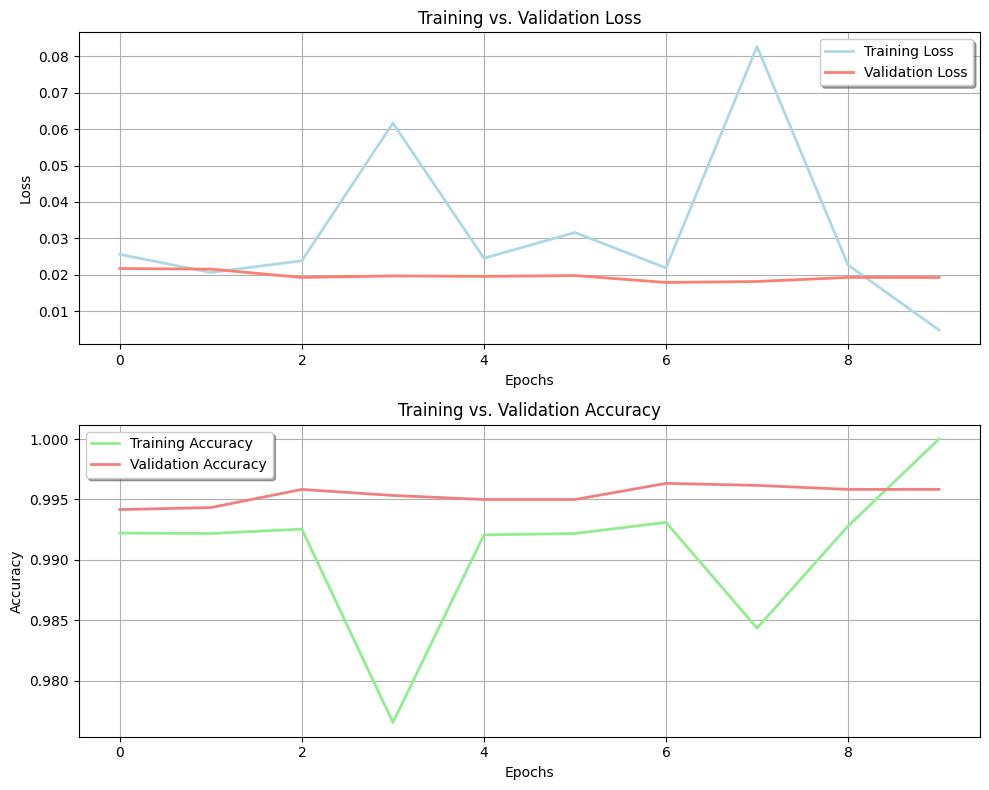

In [ ]:
# The loss and accuracy curves for training and validation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting Training and Validation Loss
ax[0].plot(rb36_tn52history.history['loss'], color='lightblue', label="Training Loss", linewidth=2)
ax[0].plot(rb36_tn52history.history['val_loss'], color='salmon', label="Validation Loss", linewidth=2)
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Training vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].grid(True)

# Plotting Training and Validation Accuracy
ax[1].plot(rb36_tn52history.history['accuracy'], color='lightgreen', label="Training Accuracy", linewidth=2)
ax[1].plot(rb36_tn52history.history['val_accuracy'], color='lightcoral', label="Validation Accuracy", linewidth=2)
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Training vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].grid(True)

# Improve layout and show the plots
plt.tight_layout()
plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


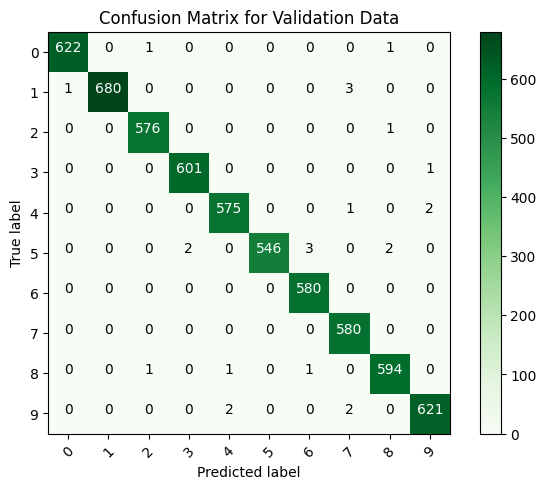

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix with a green color map
plot_confusion_matrix(confusion_mtx, classes=[str(i) for i in range(10)], title='Confusion Matrix for Validation Data')
plt.show()



# **Important Error**

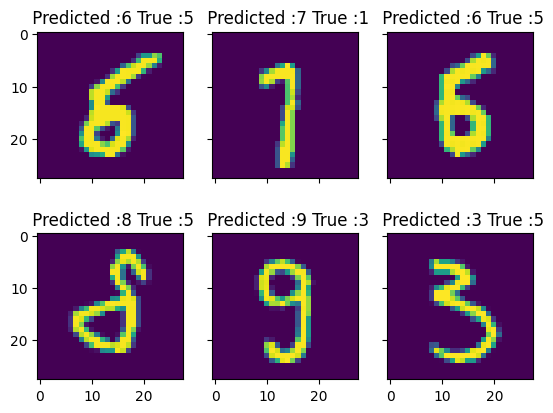

In [ ]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)



# **Predicting the test data**

In [ ]:

# Load the model with custom activation function 'softmax_v2'
custom_objects = {'softmax_v2': tf.keras.activations.softmax}

rb36tn52_cnn_model = load_model("rb36tn52CNN.keras", custom_objects=custom_objects)

# Predict results for the test set
rb36tn52_results = rb36tn52_cnn_model.predict(rb36tn52test)

# Select the index with the maximum probability
rb36tn52_results = np.argmax(rb36tn52_results, axis=1)

# Convert the results to a pandas Series
rb36tn52_results = pd.Series(rb36tn52_results, name="Label")



875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


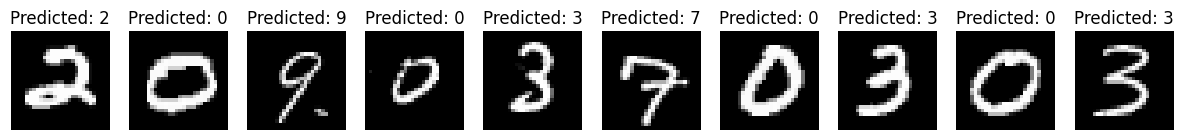

In [ ]:

# Select a subset of images to display (e.g., the first 10)
num_images_to_display = 10
images = rb36tn52test[:num_images_to_display]
predicted_labels = rb36tn52_results[:num_images_to_display]

# Create a figure and axes for the images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Iterate through the images and display them with their predicted labels
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
    ax.set_title(f"Predicted: {predicted_labels[i]}")  # Set the title with the predicted label
    ax.axis('off')  # Turn off the axes

plt.show()  # Show the figure


In [ ]:
import os
import numpy as np
from PIL import Image
import zipfile

# Create a ZIP file to store the images with a more descriptive name
output_zip = 'rb36tn52_predicted_images.zip'

# Open a new ZIP file in write mode
with zipfile.ZipFile(output_zip, 'w') as zipf:
    # Iterate through the test images and save them with more descriptive predicted labels
    for i, image in enumerate(rb36tn52test):
        predicted_label = rb36tn52_results[i]  # Get the predicted label for the current image
        predicted_label_name = f"Class_{predicted_label}"  # More descriptive label (e.g., Class_7)

        image_data = (image.reshape(28, 28) * 255).astype(np.uint8)  # Reshape and scale to 0-255
        image = Image.fromarray(image_data, mode='L')  # Create a PIL Image object

        # Generate a temporary filename with .jpg extension
        image_filename = f'image_{i}_predicted_{predicted_label_name}.jpg'

        # Save the image as JPG
        image.save(image_filename, format='JPEG')

        # Add the file to the ZIP archive
        zipf.write(image_filename)

        # Remove the temporary file
        os.remove(image_filename)

print(f"Images saved to '{output_zip}' file.")


Images saved to 'rb36tn52_predicted_images.zip' file.


In [ ]:

# Assuming 'results' contains the predicted labels for the test images
submission = pd.concat([pd.Series(range(1, len(rb36tn52_results) + 1), name="ImageId"),
                        pd.Series(rb36tn52_results, name="Label")], axis=1)

# Save the submission DataFrame to a CSV file
submission.to_csv("rb36tn52_cnn_predictions_mnist.csv", index=False)


print("Submission file 'rb36tn52_cnn_predictions_mnist.csv' has been saved.")


Submission file 'rb36tn52_cnn_predictions_mnist.csv' has been saved.
